<a href="https://colab.research.google.com/github/mariabandeira/AdministracaoPublica/blob/main/CadUnico/XGBoost/TrainningPB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [51]:
treated_data_PB = pd.read_csv('/content/cadunico_pb_cleaned.csv', sep=',', encoding='utf-8')

In [52]:
treated_data_PB.dropna(inplace=True)
treated_data_PB.drop_duplicates(inplace=True)

In [53]:
treated_data_PB.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182184 entries, 0 to 367755
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   classf                      182184 non-null  int64  
 1   vlr_renda_media_fam         182184 non-null  float64
 2   cod_local_domic_fam         182184 non-null  float64
 3   cod_especie_domic_fam       182184 non-null  float64
 4   qtd_comodos_domic_fam       182184 non-null  float64
 5   qtd_comodos_dormitorio_fam  182184 non-null  float64
 6   cod_material_piso_fam       182184 non-null  float64
 7   cod_material_domic_fam      182184 non-null  float64
 8   cod_agua_canalizada_fam     182184 non-null  float64
 9   cod_abaste_agua_domic_fam   182184 non-null  float64
 10  cod_banheiro_domic_fam      182184 non-null  float64
 11  cod_destino_lixo_domic_fam  182184 non-null  float64
 12  cod_iluminacao_domic_fam    182184 non-null  float64
 13  cod_calcamento_domi

In [54]:
treated_data_PB.head()

,classf,vlr_renda_media_fam,cod_local_domic_fam,cod_especie_domic_fam,qtd_comodos_domic_fam,qtd_comodos_dormitorio_fam,cod_material_piso_fam,cod_material_domic_fam,cod_agua_canalizada_fam,cod_abaste_agua_domic_fam,cod_banheiro_domic_fam,cod_destino_lixo_domic_fam,cod_iluminacao_domic_fam,cod_calcamento_domic_fam,cod_familia_indigena_fam,ind_familia_quilombola_fam,qtde_pessoas,marc_pbf
0,2,190.0,1.0,1.0,4.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,4,0
1,2,70.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1,1
2,2,3.0,2.0,1.0,3.0,1.0,2.0,1.0,2.0,4.0,1.0,3.0,1.0,3.0,2.0,2.0,2,1
3,2,600.0,1.0,1.0,5.0,2.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1,0
4,2,120.0,1.0,1.0,5.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,5,1


In [55]:
list(treated_data_PB.columns)

['classf',
 'vlr_renda_media_fam',
 'cod_local_domic_fam',
 'cod_especie_domic_fam',
 'qtd_comodos_domic_fam',
 'qtd_comodos_dormitorio_fam',
 'cod_material_piso_fam',
 'cod_material_domic_fam',
 'cod_agua_canalizada_fam',
 'cod_abaste_agua_domic_fam',
 'cod_banheiro_domic_fam',
 'cod_destino_lixo_domic_fam',
 'cod_iluminacao_domic_fam',
 'cod_calcamento_domic_fam',
 'cod_familia_indigena_fam',
 'ind_familia_quilombola_fam',
 'qtde_pessoas',
 'marc_pbf']

### Treinando o modelo XGBoost

In [69]:
# analisando a distribuição da variável alvo (marc_pbf)
target_distribution = treated_data_PB['marc_pbf'].value_counts(normalize=True) * 100

print(round(target_distribution, 2))

marc_pbf
1    60.96
0    39.04
Name: proportion, dtype: float64


In [70]:
# separar X (features) e y (target)
X = treated_data_PB.drop('marc_pbf', axis=1)
y = treated_data_PB['marc_pbf']

# treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# criando uma instância do RandomUnderSampling
rus = RandomUnderSampler(random_state=42, sampling_strategy = 'majority')

# balanceando os dados
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

print(y_resampled.value_counts())

marc_pbf
0    49935
1    49935
Name: count, dtype: int64


In [71]:
# aplicar padronização nas features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

print("Primeiros dados escalados (padronizados):")
print(X_train_scaled[:5])

Primeiros dados escalados (padronizados):
[[-1.94675229  0.25998787 -0.66351538  0.         -1.13901679  0.21086124
   1.58901493 -0.30371528 -0.63344419 -0.68283037 -0.32494349 -0.64034823
  -0.30392907 -1.16344252  0.          0.08346976  0.07556882]
 [-0.56513795 -0.13902563 -0.66351538  0.         -1.13901679 -1.08954091
  -0.53557624 -0.30371528 -0.63344419 -0.68283037 -0.32494349 -0.64034823
  -0.30392907 -1.16344252  0.          0.08346976  1.48597033]
 [-0.56513795  0.18154932 -0.66351538  0.          0.17970507  0.21086124
   1.58901493 -0.30371528 -0.63344419 -0.68283037 -0.32494349 -0.64034823
  -0.30392907 -1.16344252  0.          0.08346976  0.78076958]
 [ 0.81647638  0.31796419 -0.66351538  0.          0.839066    0.21086124
  -0.53557624 -0.30371528 -0.63344419 -0.68283037 -0.32494349 -0.64034823
  -0.30392907 -1.16344252  0.          0.08346976 -0.62963193]
 [-0.56513795  0.42709609 -0.66351538  0.          1.49842693  1.51126339
   1.58901493 -0.30371528 -0.63344419 -0

In [72]:
final_model = xgb.XGBClassifier()
final_model.fit(X_train_scaled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [73]:
# Faça previsões nos dados de teste
y_pred = final_model.predict(X_test_scaled)

# Imprima o relatório de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82     21189
           1       0.86      0.93      0.90     33467

    accuracy                           0.87     54656
   macro avg       0.87      0.85      0.86     54656
weighted avg       0.87      0.87      0.86     54656



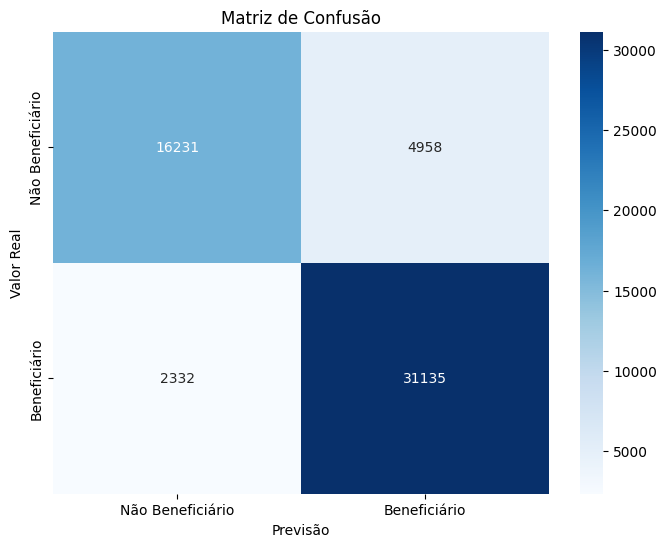

In [74]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Define o tamanho da figura
plt.figure(figsize=(8, 6))

# Cria o mapa de calor usando imshow
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Não Beneficiário", "Beneficiário"],
            yticklabels=["Não Beneficiário", "Beneficiário"])

# Define os títulos dos eixos e o título do gráfico
plt.xlabel("Previsão")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusão")

# Exibe o gráfico
plt.show()

### Selecionando features com SelectKBests

In [62]:
selector = SelectKBest(score_func=f_classif, k=5)
X_train_selected = selector.fit_transform(X_resampled, y_resampled)
X_test_selected = selector.transform(X_test)

selected_columns = X_train.columns[selector.get_support()]
print("Características selecionadas:", selected_columns)

Características selecionadas: Index(['vlr_renda_media_fam', 'qtd_comodos_domic_fam',
       'cod_agua_canalizada_fam', 'cod_abaste_agua_domic_fam', 'qtde_pessoas'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 3 14] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [66]:
# Treine o modelo final com o melhor valor de k
final_model = xgb.XGBClassifier()
final_model.fit(X_train_selected, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [67]:
# Faça previsões nos dados de teste
y_pred_selected = final_model.predict(X_test_selected)

# Imprima o relatório de classificação
print(classification_report(y_test, y_pred_selected))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82     21189
           1       0.86      0.93      0.90     33467

    accuracy                           0.87     54656
   macro avg       0.87      0.85      0.86     54656
weighted avg       0.87      0.87      0.87     54656



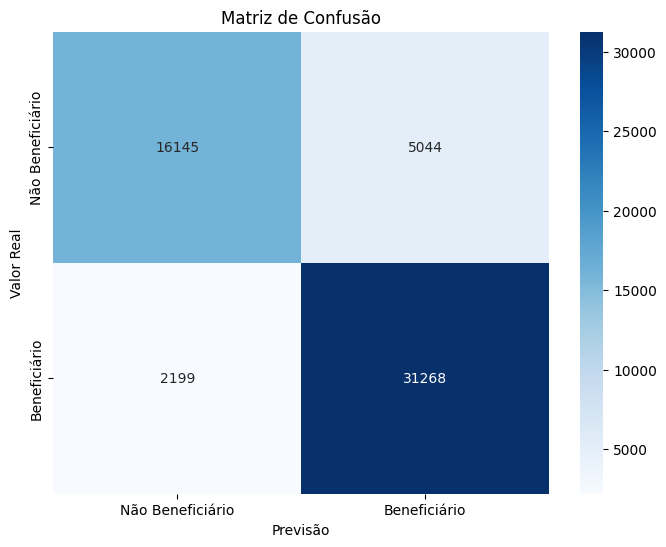

In [68]:
conf_matrix = confusion_matrix(y_test, y_pred_selected)

# Define o tamanho da figura
plt.figure(figsize=(8, 6))

# Cria o mapa de calor usando imshow
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Não Beneficiário", "Beneficiário"],
            yticklabels=["Não Beneficiário", "Beneficiário"])

# Define os títulos dos eixos e o título do gráfico
plt.xlabel("Previsão")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusão")

# Exibe o gráfico
plt.show()